# **MNIST**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
X , Y = mnist.data , mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

In [5]:
Y.shape

(70000,)

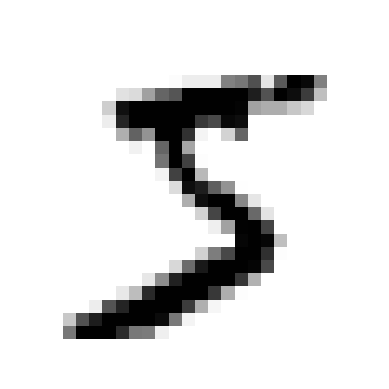

In [6]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image , cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
Y[0]

'5'

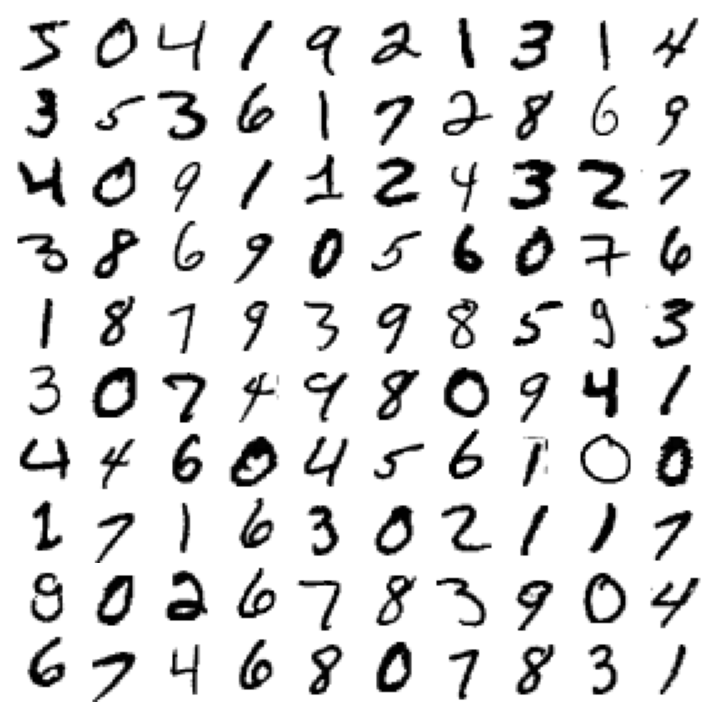

In [8]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [9]:
X_train , X_test , Y_train , Y_test = X[:60000] , X[60000:] , Y[:60000] , Y[60000:]

# **Training a Binary Classifier**

In [10]:
Y_train_5 = (Y_train == '5')

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train , Y_train_5 )

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# **Performance Measures**

# **Measuring Accuracy using Cross-Validation**

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , Y_train_5 , cv=3 , scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train , Y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [15]:
cross_val_score(dummy_clf,X_train,Y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [16]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf , X_train , Y_train_5 , cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train_5,Y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(Y_train_5,Y_train_pred))
print(recall_score(Y_train_5,Y_train_pred))

0.8370879772350012
0.6511713705958311


In [19]:
from sklearn.metrics import f1_score
f1_score(Y_train_5 , Y_train_pred)

0.7325171197343846

# **Precission/Recall Trade-off**

In [20]:
Y_scores = sgd_clf.decision_function([some_digit])
Y_scores

array([2164.22030239])

In [21]:
threshold = 0
Y_some_digit_pred = (Y_scores > threshold)
Y_some_digit_pred

array([ True])

In [22]:
threshold = 3000
Y_some_digit_pred = (Y_scores > threshold)
Y_some_digit_pred

array([False])

In [23]:
Y_scores = cross_val_predict(sgd_clf , X_train , Y_train_5 , cv=3 , method="decision_function")


In [24]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(Y_train_5 , Y_scores)

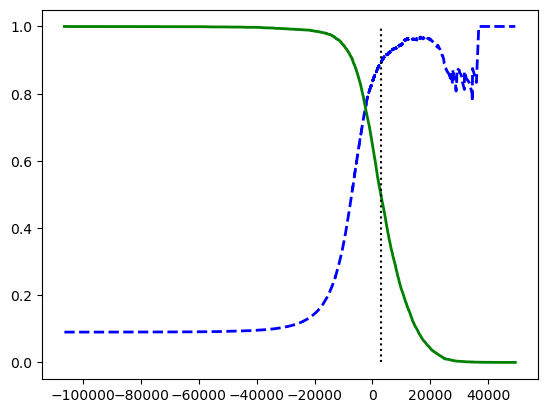

In [25]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

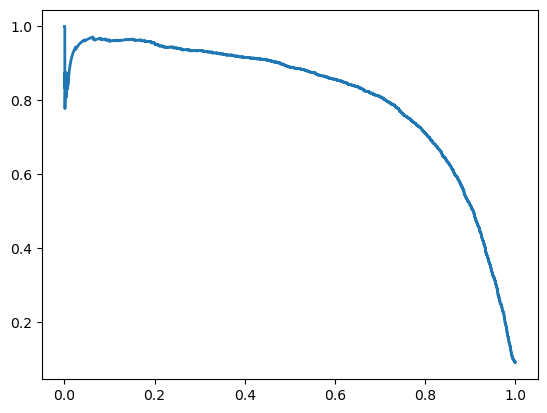

In [26]:
plt.plot(recalls , precisions , linewidth=2 , label="Precision/Recall curve")
plt.show()

In [27]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [28]:
Y_train_pred_90 = (Y_scores >= threshold_for_90_precision)
print(precision_score(Y_train_5,Y_train_pred_90))
print(recall_score(Y_train_5,Y_train_pred_90))


0.9000345901072293
0.4799852425751706


# **The ROC Curve**

In [29]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(Y_train_5 , Y_scores)

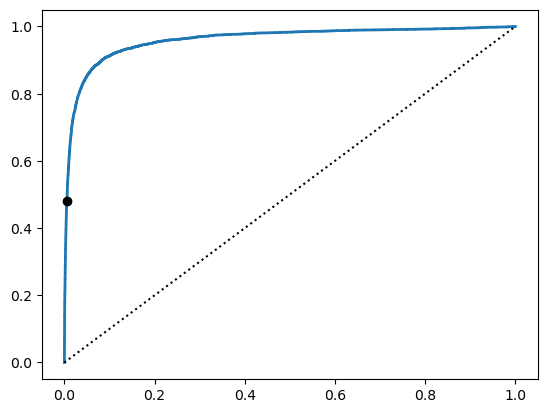

In [30]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90] , fpr[idx_for_threshold_at_90]
plt.plot(fpr , tpr , linewidth=2 , label="ROC Curve")
plt.plot([0,1],[0,1],'k:',label="Random classifier's ROC Curve")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5,Y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [33]:
Y_probas_forest = cross_val_predict(forest_clf , X_train , Y_train_5 , cv=3 , method="predict_proba")
Y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [34]:
Y_scores_forest = Y_probas_forest[:,1]
precisions_forest , recalls_forest , thresholds_forest = precision_recall_curve(Y_train_5 , Y_scores_forest)

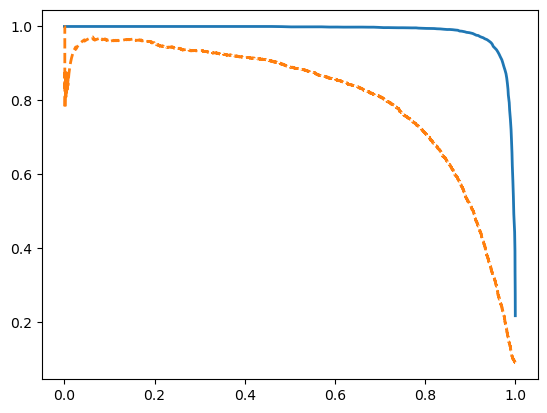

In [35]:
plt.plot(recalls_forest , precisions_forest , "-" , linewidth=2 , label="Random Forest")
plt.plot(recalls , precisions , "--" , linewidth=2 , label="SGD")
plt.show()

In [36]:
Y_train_pred_forest = Y_probas_forest[:,1] >= 0.5
f1_score(Y_train_5 , Y_train_pred_forest)

0.9274509803921569

In [37]:
roc_auc_score(Y_train_5 , Y_scores_forest)

0.9983436731328145

# **Multiclass Classification**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf , X_train_scaled , Y_train , cv=3 , scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# **Error Analysis**

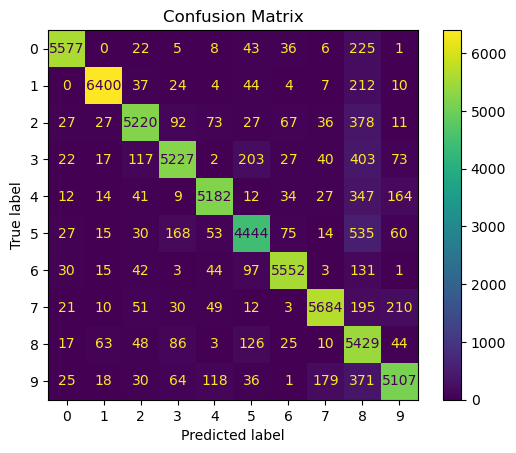

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
Y_train_pred = cross_val_predict(sgd_clf , X_train_scaled , Y_train , cv=3)
ConfusionMatrixDisplay.from_predictions(Y_train , Y_train_pred)
plt.title("Confusion Matrix")
plt.show()

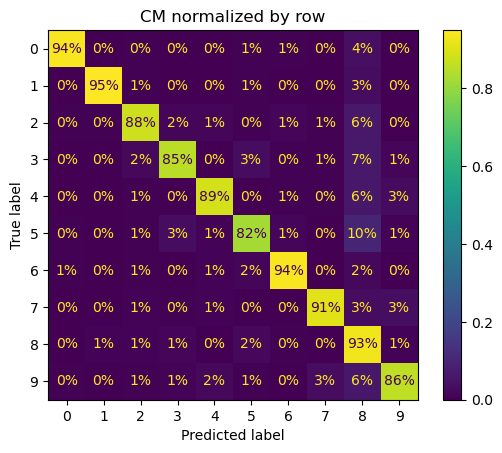

In [40]:
ConfusionMatrixDisplay.from_predictions(Y_train , Y_train_pred , normalize="true" , values_format=".0%")
plt.title("CM normalized by row")
plt.show()

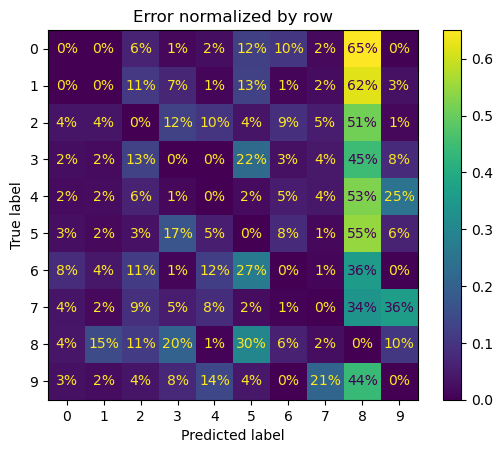

In [41]:
sample_weight = (Y_train_pred != Y_train)
ConfusionMatrixDisplay.from_predictions(Y_train , Y_train_pred , sample_weight = sample_weight , normalize="true" , values_format=".0%")
plt.title("Error normalized by row")
plt.show()

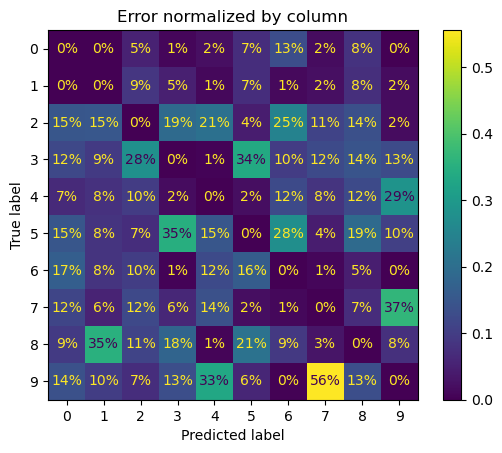

In [42]:
ConfusionMatrixDisplay.from_predictions(Y_train , Y_train_pred , sample_weight = sample_weight , normalize="pred", values_format=".0%")
plt.title("Error normalized by column")
plt.show()

# **Multilabel Classification**

In [43]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
Y_train_large = (Y_train >= '7')
Y_train_odd = (Y_train.astype('int8')%2 == 1)
Y_multilabel = np.c_[Y_train_large,Y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , Y_multilabel)

KNeighborsClassifier()

In [44]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [45]:
from sklearn.svm import SVC
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC() , cv=3 , random_state=42)
chain_clf.fit(X_train[:2000] , Y_multilabel[:2000])


ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [46]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# **Multioutput Classification**

In [47]:
np.random.seed(42)  
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

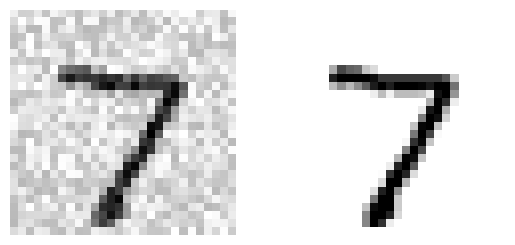

In [48]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

# **Accuracy**

In [49]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , Y_train)
test_predicted = knn_clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test , test_predicted)*100))

Accuracy of the model: 96.88%


# **Fine-Tuning The Model**

# **Grid Search**

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], Y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [52]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [53]:
grid_search.best_score_

0.9441999999999998

In [54]:
grid_search.best_estimator_.fit(X_train, Y_train)
tuned_accuracy = grid_search.score(X_test, Y_test)
print('Tuned accuracy of the model: {0}%'.format(tuned_accuracy*100))

Tuned accuracy of the model: 97.14%
